<div style="width: 100%; clear: both;">
<img src="https://www.publicdomainpictures.net/pictures/100000/velka/tree-1409159715eln.jpg", align="left", width="175", height="175">   
<div style="float: left; width: 100%; font-family: Luminari, fantasy;">
<p style="margin: ; padding-top: 10px; text-align:left;  font-size: 19px; ">Porfolio of Ruben Deulofeu Gomez</p>
    <p style="margin: 0; text-align:left; font-size: 16px;">Data science & Machine Learning </p>
    <p style="margin: 0; text-align:left; padding-bottom: 10px; font-size: 16px;">2021</p>
</div>
</div>

# Deep Learning for Bot Attack Classification

## 0. Dataset and requirements

The objective is to identificate and classificate some bot attacks from the security camera Provision PT-838. 

Find out more details by following the links listed below.

http://archive.ics.uci.edu/ml/datasets/detection_of_IoT_botnet_attacks_N_BaIoT

https://www.kaggle.com/mkashifn/nbaiot-dataset

In [75]:
# Import libraries

import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam, SGD, Adadelta, Adagrad

## 1. Preprocessing

In [76]:
# Import dataset
df = pd.read_csv("botnet_dataset_DL.csv") # change path if needed
df.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,48.425580,71.904131,24.949467,77.620803,69.951188,40.289010,299.581342,68.360789,47.135899,3519.822606,...,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,syn
1,119.590050,226.137230,56456.795310,168.754281,260.611699,61253.437829,421.157397,314.586144,63992.403336,3336.871307,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,ack
2,59.829530,531.072040,16453.585406,110.536304,488.924555,33059.533136,347.374512,422.394805,52038.572277,3574.084619,...,0.0,0.0,1.0,566.0,0.0,566.0,0.0,0.0,0.0,ack
3,34.422248,60.252680,3.507241,47.394048,60.421635,5.916155,178.947119,63.183432,34.808436,3110.078810,...,0.0,0.0,1.0,60.0,0.0,60.0,0.0,0.0,0.0,syn
4,40.422555,73.561035,5.952990,72.789610,72.333152,20.562873,298.087754,69.637324,42.122485,3674.455203,...,0.0,0.0,1.0,74.0,0.0,74.0,0.0,0.0,0.0,syn


In [77]:
# Basic information about our dataset
print("Quantity of Variables, including target:", len(df.columns), "\n")
print("Quantity of Instances:", len(df), "\n")

classes_info = pd.DataFrame(
    {'# Instances': df.type.value_counts().values, # Type variable contains the target column
     'Proportion': df.type.value_counts(normalize=True).round(2)
    })

classes_info

Quantity of Variables, including target: 116 

Quantity of Instances: 440617 



,# Instances,Proportion
benign,98514,0.22
scan,97096,0.22
udp,71374,0.16
syn,61851,0.14
ack,57997,0.13
udpplain,53785,0.12


In [78]:
#Changing pandas dataframe to numpy array
features = df.iloc[:,:115].values
labels = df.iloc[:,115:116].values

In [79]:
# Standarization via sklearn
features = StandardScaler().fit_transform(features)

# One-hot Encoding via sklearn
labels = OneHotEncoder().fit_transform(labels).toarray()

In [80]:
# Definition of the training set and test set.
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.2)

## 2. Classification 

We will find out which combination of depth, learning rate and optimizer performs better in our classification objective.

## 2.1 Depth

In [81]:
# Model with 2 hidden layers
model_2_h = Sequential()
model_2_h.add(Dense(10, activation="relu"))
model_2_h.add(Dense(8, activation="relu"))
model_2_h.add(Dense(6, activation='softmax'))

# Model with 3 hidden layers
model_3_h = Sequential()
model_3_h.add(Dense(32, activation="relu"))
model_3_h.add(Dense(10, activation="relu"))
model_3_h.add(Dense(8, activation="relu"))
model_3_h.add(Dense(6, activation='softmax'))

# Model with 4 hidden layers
model_4_h = Sequential()
model_4_h.add(Dense(64, activation="relu"))
model_4_h.add(Dense(32, activation="relu"))
model_4_h.add(Dense(10, activation="relu"))
model_4_h.add(Dense(8, activation="relu"))
model_4_h.add(Dense(6, activation='softmax'))

# Model with 5 hidden layers
model_5_h = Sequential()
model_5_h.add(Dense(96, activation="relu"))
model_5_h.add(Dense(64, activation="relu"))
model_5_h.add(Dense(32, activation="relu"))
model_5_h.add(Dense(10, activation="relu"))
model_5_h.add(Dense(8, activation="relu"))
model_5_h.add(Dense(6, activation='softmax'))


# Optimizer and compilation
opt = keras.optimizers.Adam(learning_rate = 0.01)
models = [model_2_h, model_3_h, model_4_h, model_5_h]
time_list = []
trainings = []

for model in models:
    model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=["accuracy"])
    start = time.process_time()
    training = model.fit(train_x, train_y, epochs=20, validation_split=0.2, batch_size = 115, verbose = 0)
    timer = time.process_time() - start
    time_list.append(timer)
    trainings.append(training)


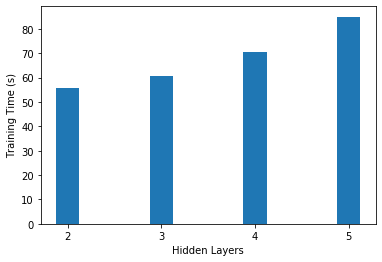

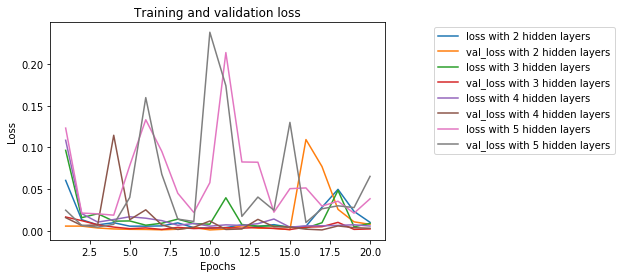

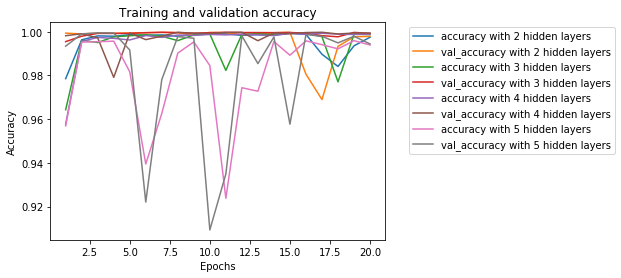

Mean Accuracy with 2 hidden layers =  0.996
Mean Accuracy with 3 hidden layers =  0.9946
Mean Accuracy with 4 hidden layers =  0.9962
Mean Accuracy with 5 hidden layers =  0.9812


In [94]:
# Plotting results
hidden_layers = ["2", "3", "4", "5"]

plt.bar(hidden_layers, time_list, width=0.25)
plt.xlabel("Hidden Layers")
plt.ylabel("Training Time (s)")
plt.show()
plt.clf()

losses = ["loss", "val_loss"]
accs = ["accuracy", "val_accuracy"]
epochs = range(1, 21) 

for training, h_layer in zip(trainings, hidden_layers):
    for loss in losses:  
        plt.plot(epochs, training.history[loss], label= loss + ' with ' +  h_layer + ' hidden layers')
        
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.7, 1.))
plt.show()

plt.clf()

for training, h_layer in zip(trainings, hidden_layers):
    for acc in accs:  
        plt.plot(epochs, training.history[acc], label= acc + ' with ' +  h_layer + ' hidden layers')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.7, 1.))
plt.show()

for training, h_layer in zip(trainings, hidden_layers):
    print("Mean Accuracy with "+ h_layer + ' hidden layers = ', round(sum(training.history["accuracy"])/20, 4))    

As we can see, more depth means more computation time but not better performence. 

From now on, we will consider a 4 hidden layer network as the baseline model due to accuracy graphics. 

## 2.2 Learning Rates and Optimizers

In this section, we will determine which optimizer and which learning rate performs better for our objective.  

In [97]:
def get_model(opt):
    model = Sequential()
    model.add(Dense(64, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(6, activation='softmax'))

    model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics=["accuracy"])

    start = time.process_time()
    training = model.fit(train_x, train_y, epochs=20, validation_split=0.2, batch_size = 115, verbose = 0)  
    timer = time.process_time() - start

    return training, timer, model

keys = ["Adam", "SGD", "Adagrad", "Adadelta"]
stats = ["Accuracy", "Timer", "Training", "Model"]

optimizers = {key: {stat:[] for stat in stats} for key in keys}

learning_rates = [0.001, 0.01, 0.05, 0.1]

for lr in learning_rates:
    adam_opt = Adam(learning_rate = lr)
    sgd_opt = SGD(learning_rate = lr)
    adadelta_opt = Adadelta(learning_rate = lr)
    adagrad_opt = Adagrad(learning_rate = lr)

    for x, key in zip([adam_opt, sgd_opt, adadelta_opt, adagrad_opt], list(optimizers.keys())):

        training, timer, model = get_model(x)
        optimizers[key]["Accuracy"].append(sum(training.history["accuracy"])/len(training.history["accuracy"]))
        optimizers[key]["Timer"].append(timer)
        optimizers[key]["Training"].append(training)
        optimizers[key]["Model"].append(model)

        keras.backend.clear_session()

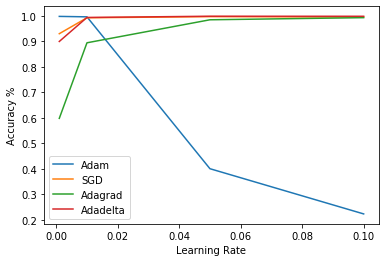

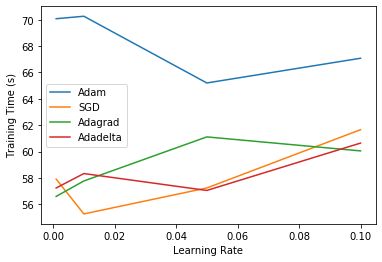

In [98]:
# Plotting results

for key in list(optimizers.keys()):
    plt.plot(learning_rates, [x for x in optimizers[key]["Accuracy"]], label = key)
plt.legend()
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy %")
plt.show()
plt.clf()

for key in list(optimizers.keys()):
    plt.plot(learning_rates, [x for x in optimizers[key]["Timer"]], label = key)
plt.legend()
plt.xlabel("Learning Rate")
plt.ylabel("Training Time (s)")
plt.show()

In [99]:
for key in optimizers.keys():
      print(key, [round(x, 4) for x in optimizers[key]["Accuracy"]])

Adam [0.9974, 0.9956, 0.4, 0.2226]
SGD [0.9295, 0.992, 0.9965, 0.995]
Adagrad [0.5975, 0.8938, 0.9841, 0.9925]
Adadelta [0.899, 0.9932, 0.998, 0.9978]


Accuracy stats show that the better model for botnet classification is Adadelta with a learning rate equal to 0.05. 

## 2.3 Final Model Performance

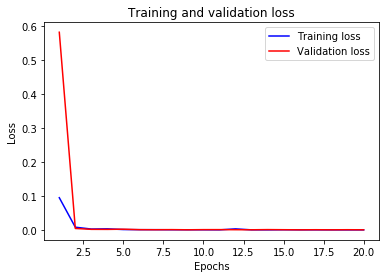

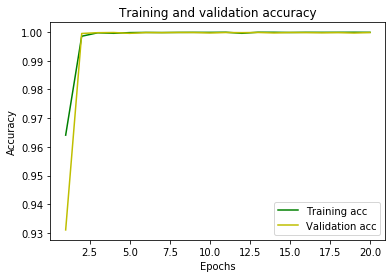

In [102]:
winner_training = optimizers["Adadelta"]["Training"][2]

loss = winner_training.history['loss']
val_loss = winner_training.history['val_loss']
acc = winner_training.history['accuracy']
val_acc = winner_training.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [103]:
winner_model = optimizers["Adadelta"]["Model"][3]
y_pr = winner_model.predict(test_x)
predictions = [np.argmax(y_pr[i]) for i in range(len(y_pr))]      
test_y_num = [np.argmax(test_y[i]) for i in range(len(test_y))]

print("Confusion Matrix:\n",confusion_matrix(test_y_num,predictions),"\nModel accuracy in test set = {:0.5f}".format(accuracy_score(test_y_num,predictions)))

Confusion Matrix:
 [[11584     0     1     0     0     0]
 [    0 19599     1     0     0     0]
 [    0     2 19633     0     0     0]
 [    0     3     0 12381     0     0]
 [    1     3     0     0 14212     0]
 [    4     0     0     0     0 10700]] 
Model accuracy in test set = 0.99983


Due to the above graphics, we can conclude that the training has been successful (without overfitting) and the model performs very well with more than 99.9% accuracy in the test set. 